In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from daft import DaFT

In [2]:
np.random.seed(123)

In [3]:
means = [(0,6), (-4,4), (-6,0), (-4,-4), (0,-6), (4,-4), (6,0), (4,4)]

n_blob = 2000

P = np.random.multivariate_normal(mean=np.zeros(2), cov=np.eye(2), size=n_blob)
for m in means:
    P = np.vstack([P, np.random.multivariate_normal(mean=np.array(m), 
                                                    cov=1*np.eye(2), 
                                                    size=int(n_blob/2))])

In [4]:
n_sub = 10

In [5]:
Q_random = P[np.random.randint(P.shape[0], size=n_sub), :]

In [6]:
my_daft = DaFT(P, n_sub)
Q_best = my_daft.run(n=500, ngen=200)

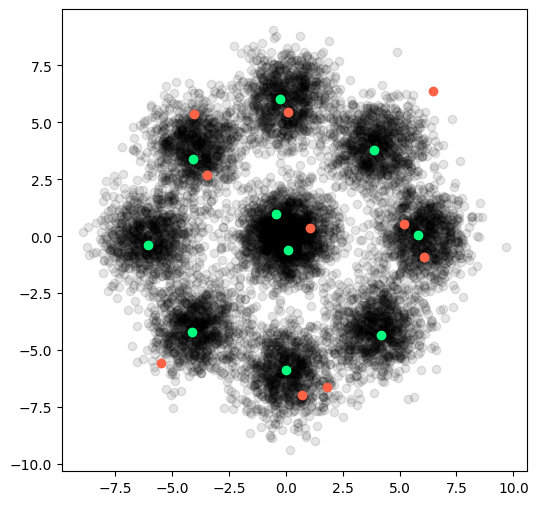

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(P[:,0], P[:,1], alpha=0.1, c='k')
plt.scatter(Q_random[:,0], Q_random[:,1], alpha=1, c='tomato')
plt.scatter(Q_best[:,0], Q_best[:,1], alpha=1, c='springgreen')
plt.show()